In [83]:
# Import necessary libraries

import numpy as np                               # Import numpy
import pandas as pd
from skimage import data, io                     # Import skimage library (data - Test images and example data.
                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)

import os                                        # This module provides a portable way of using operating system dependent functionality.
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

from google.colab.patches import cv2_imshow      # To show images using cv2 module
import cv2


In [84]:
# Mount Google drive so dataset can be accessed (The dataset file (monkeys_dataset.zip) is inside google drive.)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
from PIL import Image
images = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')

In [86]:
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')
labels=pd.DataFrame(labels) 
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


## Image Visualization


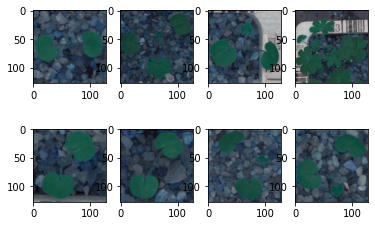

In [87]:
# Show as example the first image; first = position 0 in numpy
#plt.imshow(images[0], cmap='gray')

# Show some example images
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i],cmap='gray')
    

In [88]:
print('The shape of image is: ', images[0].shape)
# Extracting the height and width of an image 
h, w = images[0].shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (128, 128, 3)
Height = 128,  Width = 128


In [89]:
# Image as multidimensional array:
print('Image Matrix: \n', images[0])
print(type(images[0]))

Image Matrix: 
 [[[ 35  52  78]
  [ 36  49  76]
  [ 31  45  69]
  ...
  [ 78  95 114]
  [ 76  93 110]
  [ 80  95 109]]

 [[ 33  46  68]
  [ 37  50  73]
  [ 48  65  83]
  ...
  [ 81  96 113]
  [ 74  89 105]
  [ 83  95 109]]

 [[ 34  50  68]
  [ 35  52  72]
  [ 70  85 101]
  ...
  [ 83  97 112]
  [ 79  94 108]
  [ 79  94 107]]

 ...

 [[ 35  50  69]
  [ 42  57  73]
  [ 42  57  72]
  ...
  [ 60  76  92]
  [ 67  81  97]
  [ 64  77  95]]

 [[ 36  52  67]
  [ 48  63  78]
  [ 41  57  73]
  ...
  [ 44  66  83]
  [ 58  76  91]
  [ 57  74  90]]

 [[ 44  58  70]
  [ 43  57  73]
  [ 40  55  72]
  ...
  [ 41  70  92]
  [ 55  78  97]
  [ 61  79  96]]]
<class 'numpy.ndarray'>


Original Image:


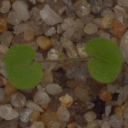

Output after grayscale conversion:


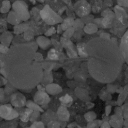

In [90]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY)
print("Original Image:")
cv2_imshow(images[0])
print("Output after grayscale conversion:")
cv2_imshow(gray)

## Data Pre processing


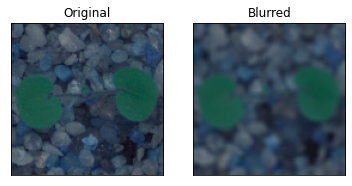

In [91]:
#Blurring 1 image
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = images[0]

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [92]:
#Blurring all the images
Img = []
for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)  
    #plt.subplot(2, 3, 1); plt.imshow(blurImg)
    Img.append(blurImg) 
Img = np.asarray(Img)

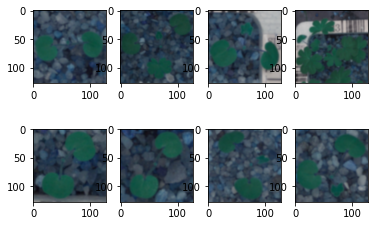

In [93]:
# Show sample result of blurred images

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(Img[i],cmap='gray')


In [94]:
#Normalizing the input blurred image
Img = Img / 255

## Convert the label into one hot encoder

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


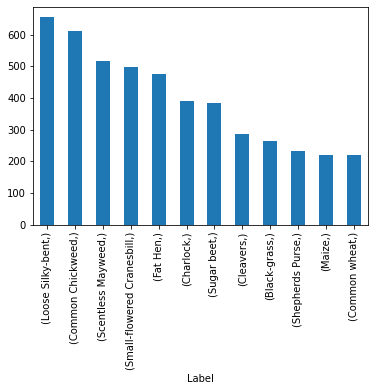

In [95]:
from keras.utils import np_utils
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(labels)
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(labels)

# Make labels categorical
clearTrainLabel = np_utils.to_categorical(encodeTrainLabels)
num_clases = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_clases))

# Plot of label types numbers
labels.value_counts().plot(kind='bar')

## Train Test Split


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Img, clearTrainLabel, 
                                                test_size=0.3, random_state=7, 
                                                stratify = clearTrainLabel)

In [97]:
print(Y_train.shape)
print(Y_test.shape)
print(X_train.shape)
print(X_test.shape)

(3325, 12)
(1425, 12)
(3325, 128, 128, 3)
(1425, 128, 128, 3)


In [98]:
Y_train
Y_train[0] #Print the label for Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Build CNN


In [99]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 10
epochs = 40
num_predictions = 20

In [100]:
from tensorflow.keras import datasets, models, layers, optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
batch_size = None

model = Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))


model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)       

In [101]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [102]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [103]:
# Network structure is summarized which confirms our design was implemented correctly.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)       

In [104]:
X_train = X_train.astype('float32') # Conversion to float type from integer type.
X_test = X_test.astype('float32')
#X_train /= 255.0 # Division by 255
#X_test /= 255.0

In [105]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [106]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

print(X_train.shape)
print(X_test.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)


Epoch 1/40
104/104 [==============================] - 4s 32ms/step - loss: 5.8041 - accuracy: 0.1652 - val_loss: 2.5357 - val_accuracy: 0.0463

Epoch 00001: val_loss improved from inf to 2.53572, saving model to cifar_cnn_checkpoint_01_loss2.5357.h5
Epoch 2/40
104/104 [==============================] - 3s 30ms/step - loss: 1.9377 - accuracy: 0.3366 - val_loss: 2.6274 - val_accuracy: 0.1382

Epoch 00002: val_loss did not improve from 2.53572
Epoch 3/40
104/104 [==============================] - 3s 30ms/step - loss: 1.6746 - accuracy: 0.4288 - val_loss: 2.6855 - val_accuracy: 0.1530

Epoch 00003: val_loss did not improve from 2.53572
Epoch 4/40
104/104 [==============================] - 3s 30ms/step - loss: 1.5155 - accuracy: 0.4593 - val_loss: 2.9322 - val_accuracy: 0.1937

Epoch 00004: val_loss did not improve from 2.53572
Epoch 5/40
104/104 [==============================] - 3s 30ms/step - loss: 1.4028 - accuracy: 0.5134 - val_loss: 2.1883 - val_accuracy: 0.2730

Epoch 00005: val_loss

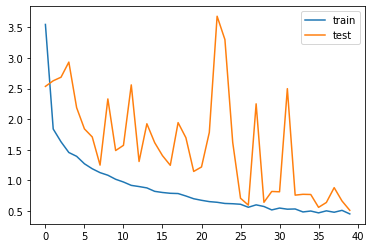

In [107]:
history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, Y_test),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [108]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

45/45 [==============================] - 0s 9ms/step - loss: 0.5132 - accuracy: 0.8533
Test loss: 0.5131655335426331
Test accuracy: 0.8533333539962769


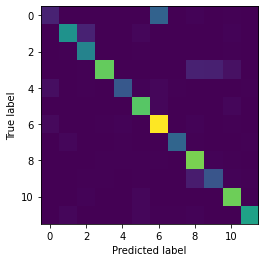

In [109]:
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset
predY = model.predict(X_test)
predYClasses = np.argmax(predY, axis = 1) 

trueY = np.argmax(Y_test, axis = 1) 
confusionMTX = confusion_matrix(trueY, predYClasses)
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.imshow(confusionMTX)


Common Chickweed


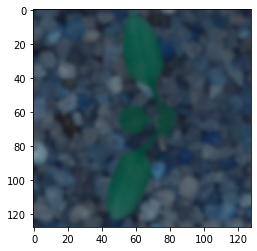

In [110]:
plt.imshow(X_test[2],cmap='gray')
print(le.classes_[predYClasses[2]])

Scentless Mayweed


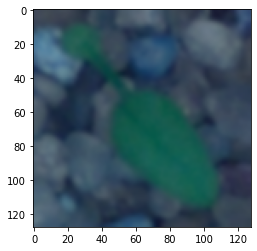

In [111]:
plt.imshow(X_test[3],cmap='gray')
print(le.classes_[predYClasses[3]])

Scentless Mayweed


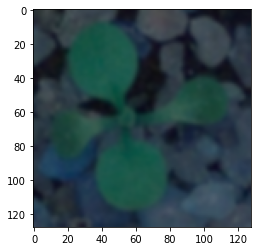

In [112]:
plt.imshow(X_test[33],cmap='gray')
print(le.classes_[predYClasses[33]])

Sugar beet


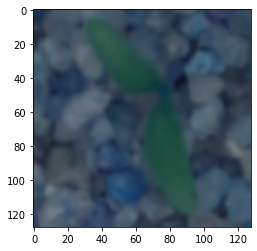

In [113]:
plt.imshow(X_test[36],cmap='gray')
print(le.classes_[predYClasses[36]])

Maize


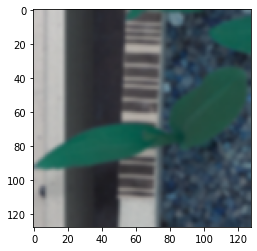

In [114]:
plt.imshow(X_test[59],cmap='gray')
print(le.classes_[predYClasses[59]])